In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import spatial
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error
from tqdm.auto import tqdm

In [2]:
df = pd.read_csv('/pio/scratch/1/i313924/data/train_data/slim_ratings.csv',
                 names=['asin', 'reviewerID', 'overall', 'unixReviewTime'])
df = df.rename(columns={"reviewerID": "u_id", "asin": "i_id", "overall": "rating"})

In [3]:
model = pd.read_pickle('/pio/scratch/1/i313924/data/svd_data/model_1000_epochs_slim.pkl')

In [4]:
pred = model.predict(df)
mae = mean_absolute_error(df['rating'], pred)

In [5]:
mae

0.01951263975399876

## ABX

In [3]:
abx_tests = pd.read_json('/pio/scratch/1/i313924/data/test_data/test_ABX_weighted_slim.json', lines=True)

In [4]:
def get_item_embedding(model, asin):
    item_id = model.item_mapping_[asin]
    return model.qi_[item_id]

In [5]:
A = np.zeros((10000, 100))
B = np.zeros((10000, 100))
X = np.zeros((10000, 100))

In [6]:
for i, test in tqdm(abx_tests.iterrows()):
    A[i, :] = get_item_embedding(model, test["A"])
    B[i, :] = get_item_embedding(model, test["B"])
    X[i, :] = get_item_embedding(model, test["X"])

0it [00:00, ?it/s]

In [7]:
dist_A = ((A - X)**2).sum(axis=1)
dist_B = ((B - X)**2).sum(axis=1)

In [8]:
(dist_A < dist_B).mean()

0.4955

In [9]:
cos_dist_A = np.zeros(10000)
cos_dist_B = np.zeros(10000)
for i in tqdm(range(10000)):
    cos_dist_A[i] = spatial.distance.cosine(A[i, :], X[i, :])
    cos_dist_B[i] = spatial.distance.cosine(B[i, :], X[i, :])

  0%|          | 0/10000 [00:00<?, ?it/s]

In [10]:
(cos_dist_A < cos_dist_B).mean()

0.4967

## Suits & dresses

In [6]:
abx_tests = pd.read_json('/pio/scratch/1/i313924/data/test_data/Suits_Dresses_ABX.json', lines=True)

A = np.zeros((10000, 100))
B = np.zeros((10000, 100))
X = np.zeros((10000, 100))

for i, test in tqdm(abx_tests.iterrows()):
    A[i, :] = get_item_embedding(model, test["A"])
    B[i, :] = get_item_embedding(model, test["B"])
    X[i, :] = get_item_embedding(model, test["X"])

dist_A = ((A - X)**2).sum(axis=1)
dist_B = ((B - X)**2).sum(axis=1)

print((dist_A < dist_B).mean())

cos_dist_A = np.zeros(10000)
cos_dist_B = np.zeros(10000)

for i in tqdm(range(10000)):
    cos_dist_A[i] = spatial.distance.cosine(A[i, :], X[i, :])
    cos_dist_B[i] = spatial.distance.cosine(B[i, :], X[i, :])

print((cos_dist_A < cos_dist_B).mean())

0it [00:00, ?it/s]

0.4937


  0%|          | 0/10000 [00:00<?, ?it/s]

0.4952


## Embeddings PCA

In [11]:
item_embeddings = pd.DataFrame(model.qi_)
user_embeddings = pd.DataFrame(model.pu_)

In [12]:
item_embeddings 

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.017481,-0.021675,-0.117159,-0.094729,0.040353,-0.089308,-0.082639,0.127626,0.164240,0.207675,...,0.135704,-0.105609,0.062447,0.241227,-0.069868,-0.064961,0.097824,-0.225770,-0.084101,0.010811
1,-0.000804,0.102669,0.098835,0.006721,0.136975,-0.090999,-0.054929,0.197537,0.061871,-0.000061,...,0.100716,-0.003059,-0.102399,0.048375,0.028519,0.029228,-0.001319,0.008630,-0.099286,0.160925
2,-0.219825,-0.070399,-0.158108,0.037797,-0.071909,-0.011192,0.186431,0.030846,0.148869,-0.074436,...,-0.255054,-0.017770,0.045779,-0.143211,0.151764,0.080739,0.208654,-0.102901,-0.026929,0.021035
3,0.095779,0.073293,0.190211,0.031391,-0.132455,0.035089,-0.072927,-0.213015,0.103279,0.054130,...,-0.092712,0.022082,-0.033270,-0.093208,-0.077199,-0.094211,-0.231879,-0.055505,-0.131442,-0.112447
4,0.142119,0.234176,-0.174837,0.047262,0.057500,-0.291222,-0.042519,-0.203092,-0.016603,-0.072634,...,-0.028527,-0.083227,0.083096,0.078786,-0.119941,0.072389,0.048248,-0.028431,0.138066,0.072880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206491,0.152060,-0.099633,0.063860,0.144246,0.125970,0.121806,0.153705,0.080991,-0.053866,0.005726,...,0.079126,-0.061765,0.017550,0.080093,0.229997,-0.094148,-0.141876,-0.143360,-0.058390,0.109127
206492,-0.028624,0.024209,0.010946,0.095033,0.038536,0.119469,-0.184084,0.063947,-0.266334,-0.118562,...,0.045233,-0.218603,0.000724,0.037148,0.053621,0.039758,0.118037,-0.080870,-0.057733,-0.154234
206493,0.277989,-0.054314,0.195751,0.070059,-0.052454,-0.000131,-0.073640,0.134588,0.070676,0.158632,...,0.015742,0.096465,0.017991,-0.035293,0.001237,0.121334,0.242130,0.000424,0.012814,-0.001148
206494,0.072192,0.084432,0.062291,0.048345,-0.067904,-0.104211,0.143366,-0.007733,-0.075901,-0.067454,...,0.145105,0.043517,-0.017774,-0.104856,0.309013,0.144345,0.077805,0.080893,0.016805,0.094447


In [13]:
embeddings = pd.concat([item_embeddings, user_embeddings], keys=['items', 'users'])

In [14]:
pca = PCA(n_components=2)
pca.fit(embeddings)

PCA(n_components=2)

In [15]:
reduced_item_embeddings = pd.DataFrame(pca.transform(embeddings.loc["items"]))
reduced_user_embeddings = pd.DataFrame(pca.transform(embeddings.loc["users"]))

In [16]:
reduced_item_embeddings

,0,1
0,-0.313614,0.067670
1,-0.060587,-0.209869
2,0.065551,-0.393025
3,-0.133972,0.101586
4,0.178902,-0.094540
...,...,...
206491,-0.100970,-0.020931
206492,0.194027,0.015031
206493,-0.057389,-0.173390
206494,0.012150,-0.015986


In [17]:
reduced_user_embeddings

,0,1
0,0.250573,-0.148942
1,-0.070930,0.162896
2,-0.139065,-0.084848
3,-0.365544,-0.306524
4,0.332708,0.058723
...,...,...
101039,0.059733,-0.084895
101040,0.003182,-0.079392
101041,-0.143230,-0.096125
101042,0.063113,0.023555


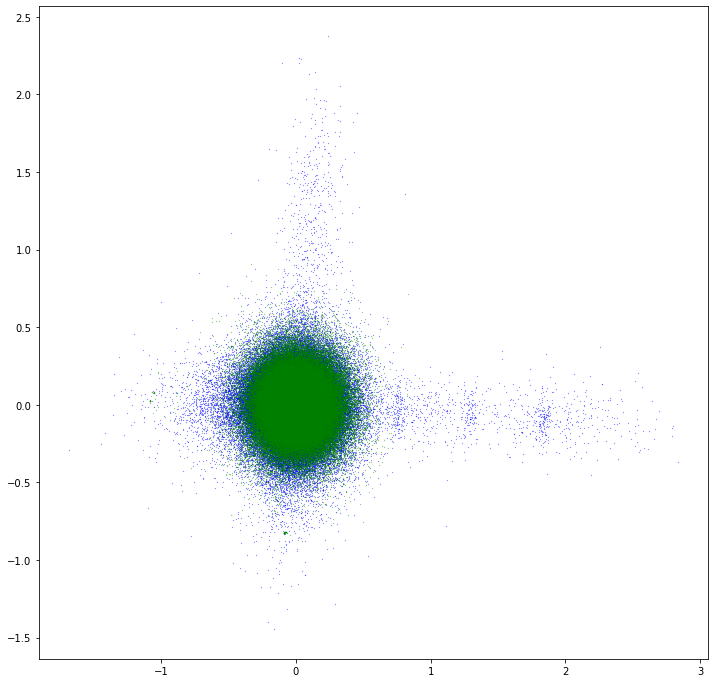

In [18]:
plt.figure(figsize=(12, 12))
plt.scatter(reduced_user_embeddings[0], reduced_user_embeddings[1], c='blue', s=0.03)
plt.scatter(reduced_item_embeddings[0], reduced_item_embeddings[1], c='green', s=0.03)

In [19]:
item_mapping = {v: k for k, v in model.item_mapping_.items()}
user_mapping = {v: k for k, v in model.user_mapping_.items()}

In [20]:
reduced_item_embeddings = reduced_item_embeddings.rename(index=item_mapping)

In [21]:
categories = pd.read_json('/pio/scratch/1/recommender_systems/interim/Amazon/meta_Clothing_Shoes_and_Jewelry_categories.json', lines=True)

In [22]:
reduced_item_embeddings = reduced_item_embeddings.join(categories.set_index('asin'))

In [23]:
reduced_item_embeddings.columns = ['0', '1', 'category_1', 'category_2']

<AxesSubplot:xlabel='0', ylabel='1'>

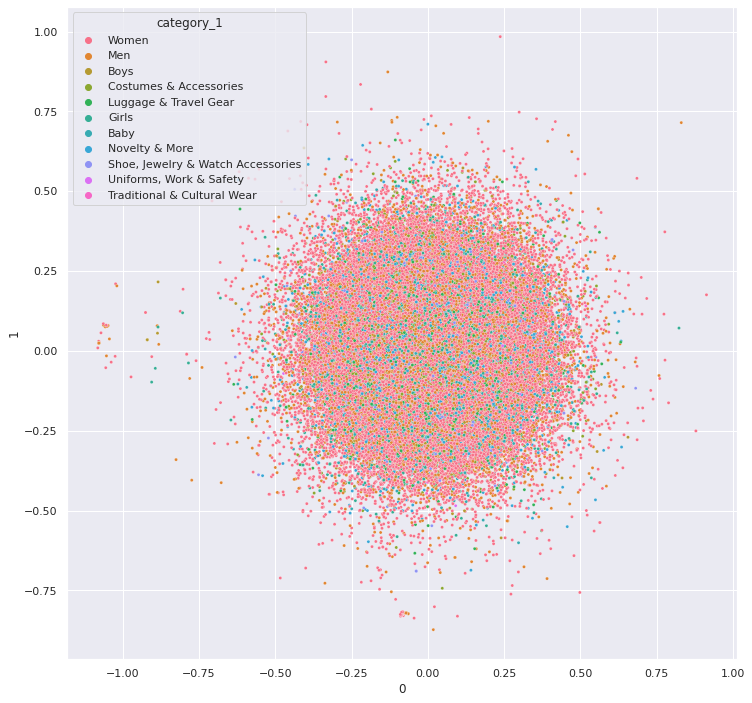

In [24]:
sns.set(rc={'figure.figsize':(12,12)})
sns.scatterplot(x='0', y='1', data=reduced_item_embeddings, hue='category_1', s=10)

<AxesSubplot:xlabel='0', ylabel='1'>

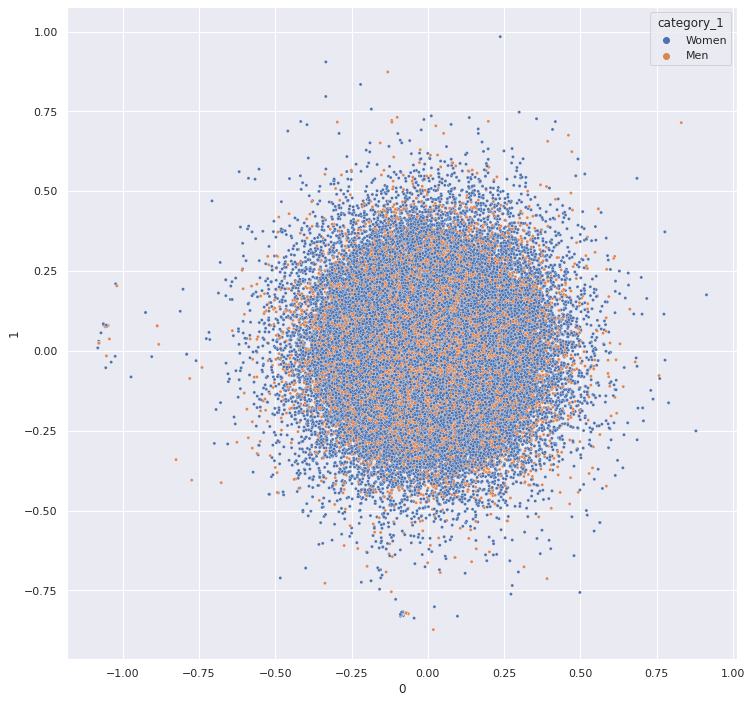

In [25]:
sns.scatterplot(x='0', y='1', data=reduced_item_embeddings[reduced_item_embeddings['category_1'].isin(['Women', 'Men'])], hue='category_1', s=10)

In [26]:
weird_items = reduced_item_embeddings[reduced_item_embeddings['0'] < -1]

In [27]:
metadata = pd.read_json('/pio/scratch/1/recommender_systems/raw/Amazon/meta_Clothing_Shoes_and_Jewelry.json.gz', lines=True, compression='gzip')

In [28]:
metadata[metadata['asin'].isin(weird_items.index)]

,category,description,title,brand,feature,rank,date,asin,imageURL,imageURLHighRes,also_view,price,fit,also_buy,main_cat,tech1,details,similar_item,tech2
439,"[Clothing, Shoes & Jewelry, Men, Shoes, Fashio...","[The iconic, timeless chuck taylor all star sn...",Converse Chuck Taylor All Star Canvas Low Top ...,NaN,"[100% Textile, Imported, Rubber sole, Shaft me...","858inClothing,ShoesJewelry(",5 star,B00006XXGO,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,"[B074CTQWYS, B078H9GNKW, B078HCG2FG, B01M9C1PD...",$18.29 - $189.99,"class=""a-normal a-align-center a-spacing-smal...","[B074CTQWYS, B078H9GNKW, B078HCG2FG, B01G2N1WK...",NaN,NaN,NaN,NaN,NaN
4143,"[Clothing, Shoes & Jewelry, Men, Shoes, Fashio...","[The iconic, timeless chuck taylor all star sn...",Converse Chuck Taylor All Star Canvas Low Top ...,NaN,"[100% Textile, Imported, Rubber sole, Shaft me...","858inClothing,ShoesJewelry(",5 star,B00006XXGO,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,"[B074CTQWYS, B078H9GNKW, B078HCG2FG, B01M9C1PD...",$18.29 - $189.99,"class=""a-normal a-align-center a-spacing-smal...","[B074CTQWYS, B078H9GNKW, B078HCG2FG, B01G2N1WK...",NaN,NaN,NaN,NaN,NaN
10647,"[Clothing, Shoes & Jewelry, Men, Shoes, Fashio...","[The iconic, timeless chuck taylor all star sn...",Converse Chuck Taylor All Star Canvas Low Top ...,NaN,"[100% Textile, Imported, Rubber sole, Shaft me...","781inClothing,ShoesJewelry(",5 star,B00093DAOQ,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,"[B074CTQWYS, B078H9GNKW, B078HCG2FG, B01G2N1WK...",$19.99 - $189.99,"class=""a-normal a-align-center a-spacing-smal...","[B074CTQWYS, B078H9GNKW, B078HCG2FG, B079XMR27...",NaN,NaN,NaN,NaN,NaN
19457,"[Clothing, Shoes & Jewelry, Women, Shoes, 100%...",[The Chuck Taylor All Star is the most iconic ...,Converse Chuck Taylor All Star Core Ox,NaN,"[100% Canvas, Imported, Rubber sole, Shaft mea...","7,718inClothing,ShoesJewelry(",5 star,B000EDKSEG,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,"[B074CTQWYS, B0797K7NV7, B078H9GNKW, B01AVKW61...",$25.93 - $199.00,"class=""a-normal a-align-center a-spacing-smal...","[B0797K7NV7, B074CTQWYS, B078J6XVCD, B078H9GNK...",NaN,NaN,NaN,NaN,NaN
19469,"[Clothing, Shoes & Jewelry, Women, Shoes, Fash...",[The Ctas Pro Ox is a fresh take on a Converse...,Converse Chuck Taylor All Star Core Ox,NaN,"[100% Canvas, Imported, Rubber sole, Shaft mea...","5,184inClothing,ShoesJewelry(",5 star,B000EDMSEE,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,"[B074CTQWYS, B0797K7NV7, B078H9GNKW, B078HCG2F...",$18.53 - $172.43,"class=""a-normal a-align-center a-spacing-smal...","[B0797K7NV7, B07FHBK8TZ, B074CTQWYS, B078H9GNK...",NaN,NaN,NaN,NaN,NaN
25124,"[Clothing, Shoes & Jewelry, Women, Shoes, Fash...",[The Ctas Pro Ox is a fresh take on a Converse...,Converse Chuck Taylor All Star Core Ox,NaN,"[100% Canvas, Imported, Rubber sole, Shaft mea...","5,980inClothing,ShoesJewelry(",5 star,B000FY06QE,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,"[B074CTQWYS, B0797K7NV7, B078H9GNKW, B078HCG2F...",$18.53 - $172.43,"class=""a-normal a-align-center a-spacing-smal...","[B0797K7NV7, B074CTQWYS, B078H9GNKW, B07K57L77...",NaN,NaN,NaN,NaN,NaN
45882,"[Clothing, Shoes & Jewelry, Men, Shoes, Fashio...",[The Chuck Taylor All Star is the most iconic ...,Converse Unisex Chuck Taylor All-Star High-Top...,NaN,"[100% Rubber, Imported, manmade-sole sole, Sha...","14,605inClothing,ShoesJewelry(",5 star,B000NZKD18,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,"[B078J5W5Z2, B07HVFM4CG, B07C8V9T7T, B07B5FVT5...",$28.79 - $186.70,"class=""a-normal a-align-center a-spacing-smal...","[B078J5W5Z2, B06Y28W39C, B07D5WQDMY, B07K598JQ...",NaN